1. '연설문.txt' 데이터를 읽어온 뒤 숫자, 특수 문자 등을 제거하는 전처리 작업을 시행하시오.

In [1]:
import pandas as pd
import numpy as np

f = open('연설문.txt','r')
data = f.read()

In [2]:
import re

text = re.sub('[^A-Za-z가-힣\\s]',' ',data)
text

'존경하고 사랑하는 국민 여러분  감사합니다 \n국민 여러분의 위대한 선택에 머리 숙여 깊이 감사드립니다  저는 오늘 대한민국 제  대 대통령으로서 새로운 대한민국을 향해 첫걸음을 내딛습니다  지금 제 두 어깨는 국민 여러분으로부터 부여받은 막중한 소명감으로 무겁습니다  지금 제 가슴은 한번도 경험하지 못한 나라를 만들겠다는 열정으로 뜨겁습니다  그리고 지금 제 머리는 통합과 공존의 새로운 세상을 열어갈 청사진으로 가득 차 있습니다 \n\n우리가 만들어가려는 새로운 대한민국은 숱한 좌절과 패배에도 불구하고 우리의 선대들이 일관되게 추구했던 나라입니다  또 많은 희생과 헌신을 감내하며 우리 젊은이들이 그토록 이루고 싶어 했던 나라입니다  그런 대한민국을 만들기 위해 저는 역사와 국민 앞에 두렵지만 겸허한 마음으로 대한민국 제  대 대통령으로서의 책임과 소명을 다할 것임을 천명합니다 \n\n함께 선거를 치른 후보들께 감사의 말씀과 심심한 위로를 전합니다  이번 선거에서는 승자도 패자도 없습니다  우리는 새로운 대한민국을 함께 이끌어가야 할 동반자입니다  이제 치열했던 경쟁의 순간을 뒤로하고 함께 손을 맞잡고 앞으로 전진해야 합니다 \n\n존경하는 국민 여러분 \n지난 몇 달 우리는 유례없는 정치적 격변기를 보냈습니다  정치는 혼란스러웠지만 국민은 위대했습니다  현직 대통령의 탄핵과 구속 앞에서도 국민들이 대한민국의 앞길을 열어주셨습니다  우리 국민들은 좌절하지 않고 오히려 이를 전화위복의 계기로 승화시켜 마침내 오늘 새로운 세상을 열었습니다  대한민국의 위대함은 국민의 위대함입니다 \n\n그리고 이번 대통령 선거에서 우리 국민들은 또 하나의 역사를 만들어주셨습니다  전국 각지에서 고른 지지로 새로운 대통령을 선택해주셨습니다  오늘부터 저는 국민 모두의 대통령이 되겠습니다  저를 지지하지 않았던 국민 한 분 한 분도 저의 국민이고  우리의 국민으로 섬기겠습니다 \n\n저는 감히 약속드립니다      년  월   일  이날은 진정한 국민통합이 시작되는 날로 역사에 기

2. 전처리된 데이터에서 명사를 추출하고 명사의 출현빈도를 10위까지 추출하여 막대그래프로 시각화하시오.

In [17]:
from konlpy.tag import Okt
from collections import Counter

okt = Okt()
nouns = okt.nouns(text)
count_dict = Counter(nouns)

top10 = pd.DataFrame({'terms':count_dict.keys(),'freq':count_dict.values()}).sort_values(by='freq',ascending=False).iloc[:10,]
top10 = top10.set_index('terms').sort_values(by = 'freq',ascending = False)
top10

,freq
terms,
국민,19
대통령,16
우리,8
대한민국,8
제,6
저,6
여러분,5
위해,4
나라,4


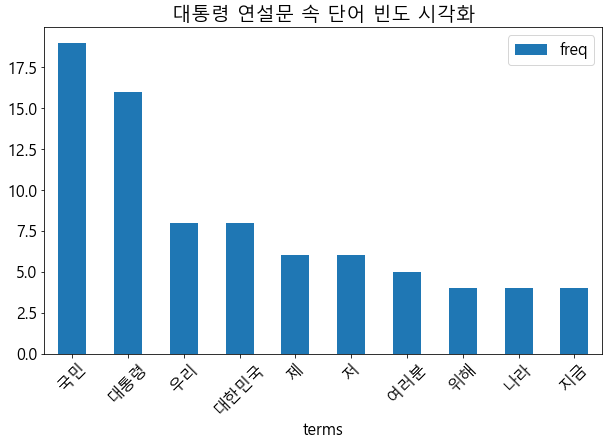

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#matplotlib 패키지 한글 폰트 설정 시작
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.size'] = 16
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(1,1)
plt.title("대통령 연설문 속 단어 빈도 시각화")
top10.plot.bar(ax = ax,rot=45)
plt.show()

3. 워드클라우드를 작성하고 인사이트를 추출하시오.

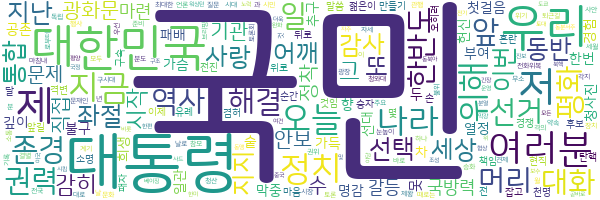

In [19]:
!pip install wordcloud
from wordcloud import WordCloud
from IPython.display import Image as image

wc = WordCloud(font_path = 'C:\\Windows\\Fonts\\NanumSquareRoundR.ttf',width = 600, height = 200, scale = 1.0, max_font_size = 200, background_color = "#FFFFFF")
wc.generate_from_frequencies(count_dict)
wc.to_file("연설문.png")
image('연설문.png')